# Part - 1

In [1]:
import pandas as pd
from scipy.io import arff
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def fit(X, y):
    weights = [0] * (len(X[0])+1)
    learning_rate = 0.01
    for i in range(len(X)):
        pred = weights[0]
        for j in range(len(X[0])):
            pred = pred + (X[i][j] * weights[j+1])
        actual = y[i]
        error = pred - actual
        while round(error, 4)!=0.0:
            weights[0] = weights[0] - (learning_rate*error)
            for j in range(len(X[0])):
                weights[j+1] = weights[j+1] - (learning_rate*error*X[i][j])
            pred = weights[0]
            for j in range(len(X[0])):
                pred = pred + X[i][j] * weights[j+1]
            error = pred - actual
    rmse = mean_squared_error(y, predict(X, weights))
    print("="*20, "RMSE :", rmse, "="*20)
    return weights

def predict(X, weights):
    y_pred = []
    for i in range(len(X)):
        pred = weights[0]
        for j in range(len(X[0])):
            pred = pred + weights[j+1]*X[i][j]
        y_pred.append(pred)
    return y_pred

def mean_squared_error(y, y_pred):
    error = 0
    for i in range(len(y)):
        error = error + (y[i] - y_pred[i])**2
    error = error/len(y)
    return error

In [3]:
data = arff.loadarff('Behavior of the urban traffic.arff')
df = pd.DataFrame(data[0])
df['Hour'] = df['Hour'].str.decode('utf-8')
df.head(5)

,Hour,Immobilized_bus,Broken_Truck,Vehicle_excess,Accident_victim,Running_over,Fire_vehicles,Occurrence_involving_freight,Incident_involving_dangerous_freight,Lack_of_electricity,Fire,Point_of_flooding,Manifestations,Defect_in_the_network_of_trolleybuses,Tree_on_the_road,Semaphore_off,Intermittent_Semaphore,Slowness_in_traffic_percent
0,7:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.1
1,7:30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.6
2,8:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.7
3,8:30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.2
4,9:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.1


In [4]:
hr = []
for i in list(df.iloc[:, 0]):
    s = int(str(i).split(':')[0])
    if 7<=s<=11:
        s1 = 'morning'
    elif 12<=s<=16:
        s1 = 'afternoon'
    else:
        s1 = 'evening'
    hr.append(s1)
df['Hour'] = hr
df.head(5)

,Hour,Immobilized_bus,Broken_Truck,Vehicle_excess,Accident_victim,Running_over,Fire_vehicles,Occurrence_involving_freight,Incident_involving_dangerous_freight,Lack_of_electricity,Fire,Point_of_flooding,Manifestations,Defect_in_the_network_of_trolleybuses,Tree_on_the_road,Semaphore_off,Intermittent_Semaphore,Slowness_in_traffic_percent
0,morning,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.1
1,morning,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.6
2,morning,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.7
3,morning,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.2
4,morning,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.1


In [5]:
# Normalization
from sklearn.preprocessing import MinMaxScaler
x = df.iloc[:, 1:-1].values
min_max_scaler = MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
l = pd.DataFrame(x_scaled)
for i in range(1, 17):
    df.iloc[:, i] = l.iloc[:, i-1]
df.head(5)

,Hour,Immobilized_bus,Broken_Truck,Vehicle_excess,Accident_victim,Running_over,Fire_vehicles,Occurrence_involving_freight,Incident_involving_dangerous_freight,Lack_of_electricity,Fire,Point_of_flooding,Manifestations,Defect_in_the_network_of_trolleybuses,Tree_on_the_road,Semaphore_off,Intermittent_Semaphore,Slowness_in_traffic_percent
0,morning,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.1
1,morning,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.6
2,morning,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.7
3,morning,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.2
4,morning,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.1


In [6]:
X = df.iloc[:, :-1]
y = list(df.iloc[:, -1])

In [7]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder = LabelEncoder()
X['Hour'] = labelencoder.fit_transform(X['Hour'])
onehotencoder = OneHotEncoder(categorical_features = [0])
X = onehotencoder.fit_transform(X).toarray()

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:392: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


In [8]:
X_train = X[:-27, :]
X_test = X[-27:, :]
y_train = y[:-27]
y_test = y[-27:]

In [9]:
# Training
weights = fit(X_train, y_train)

==================== RMSE : 29.73032800466811 ====================


In [10]:
y_pred = predict(X_test, weights)
print("Testing Error (RMSE) :", mean_squared_error(y_test, y_pred))

Testing Error (RMSE) : 13.814547163270227


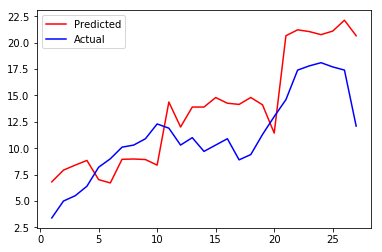

In [11]:
# Plotting prediction and actual values for testing set
x = [i for i in range(1, 28)]
plt.plot(x, y_pred, color='red', label = 'Predicted')
plt.plot(x, y_test, color='blue', label = 'Actual')
plt.legend()
plt.show()

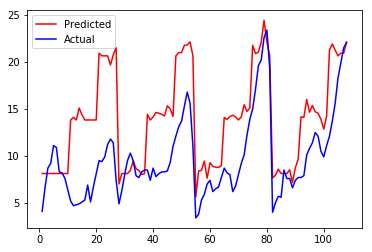

In [12]:
# Plotting prediction and actual for training set
x = [i for i in range(1, 109)]
plt.plot(x, predict(X_train, weights), color='red', label = 'Predicted')
plt.plot(x, y_train, color='blue', label = 'Actual')
plt.legend()
plt.show()

# Part - 2

In [13]:
# Training on training set
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [14]:
y_pred_0 = lin_reg.predict(X_test)

In [15]:
print("Training error (RMSE) :", mean_squared_error(y_train, lin_reg.predict(X_train)))
print("Testing error (RMSE) :", mean_squared_error(y_test, y_pred_0))

Training error (RMSE) : 5.080587555171634
Testing error (RMSE) : 13.422765803909398


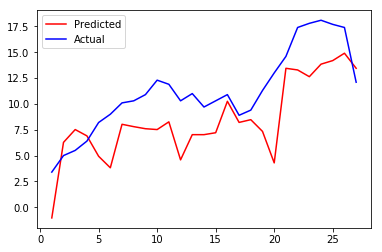

In [16]:
# Plotting prediction and actual values for testing set
x = [i for i in range(1, 28)]
plt.plot(x, y_pred_0, color='red', label = 'Predicted')
plt.plot(x, y_test, color='blue', label = 'Actual')
plt.legend()
plt.show()

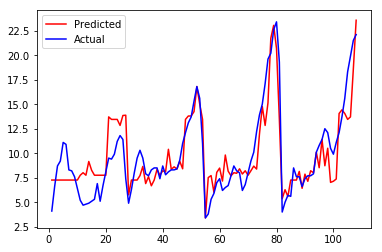

In [17]:
# Plotting prediction and actual for training set
x = [i for i in range(1, 109)]
plt.plot(x, lin_reg.predict(X_train), color='red', label = 'Predicted')
plt.plot(x, y_train, color='blue', label = 'Actual')
plt.legend()
plt.show()

## Backward Elimination

In [18]:
import statsmodels.formula.api as sm
import numpy as np

In [19]:
X1 = X.copy()
X1 = np.append(values = X1, arr = np.ones((135, 1)).astype(int), axis = 1)

In [20]:
# Significant level = 0.05

# columns = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
# columns = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 19]
# columns = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14, 15, 16, 17, 19]
# columns = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 14, 15, 16, 17, 19]
# columns = [0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 12, 14, 15, 16, 17, 19]
# columns = [0, 1, 2, 4, 5, 6, 7, 9, 10, 12, 14, 15, 16, 17, 19]
# columns = [0, 1, 2, 4, 5, 7, 9, 10, 12, 14, 15, 16, 17, 19]
# columns = [0, 1, 2, 4, 5, 7, 9, 12, 14, 15, 16, 17, 19]
# columns = [0, 1, 2, 4, 5, 7, 9, 12, 14, 15, 16, 19]
# columns = [0, 1, 2, 4, 5, 7, 12, 14, 15, 16, 19]
# columns = [0, 1, 2, 4, 5, 7, 12, 14, 15, 16]
# columns = [0, 1, 2, 5, 7, 12, 14, 15, 16]
# columns = [0, 1, 2, 5, 7, 12, 14, 16]
# columns = [0, 1, 2, 5, 12, 14, 16]
# columns = [0, 1, 2, 5, 12, 14]
columns = [0, 1, 2, 12, 14]
X_opt = X1[:, columns]
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.676
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     67.77
Date:                Tue, 13 Aug 2019   Prob (F-statistic):           7.05e-31
Time:                        00:32:56   Log-Likelihood:                -313.89
No. Observations:                 135   AIC:                             637.8
Df Residuals:                     130   BIC:                             652.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.3358      0.357     20.561      0.000       6.630       8.042
x1             1.3818      0.505      2.736      0.007       0.383       2.381
x2             7.1345      0.580     12.301      0.000       5.987       8.282
x3             7.6377      1.859      4.109      0.000       3.961      11.315
x4             7.5757      2.315      3.272      0.001       2.995      12.156
==============================================================================
Omnibus:                        2.327   Durbin-Watson:                   0.649
Prob(Omnibus):                  0.312   Jarque-Bera (JB):                1.807
Skew:                          -0.117   Prob(JB):                        0.405
Kurtosis:                       2.484   Cond. No.                         12.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [21]:
X_train_1 = X_opt[:-27, :]
X_test_1 = X_opt[-27:, :]

lin_reg_1 = LinearRegression()
lin_reg_1.fit(X_train_1, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [22]:
y_pred_1 = lin_reg_1.predict(X_test_1)

In [23]:
print("Training error (RMSE) :", mean_squared_error(y_train, lin_reg_1.predict(X_train_1)))
print("Testing error (RMSE) :", mean_squared_error(y_test, y_pred_1))

Training error (RMSE) : 5.75912560294909
Testing error (RMSE) : 8.438524131184735


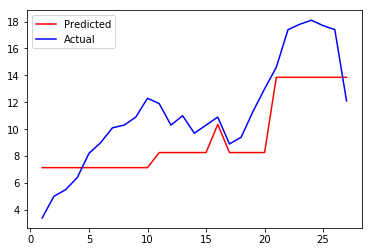

In [24]:
# Plotting prediction and actual values for testing set
x = [i for i in range(1, 28)]
plt.plot(x, y_pred_1, color='red', label = 'Predicted')
plt.plot(x, y_test, color='blue', label = 'Actual')
plt.legend()
plt.show()

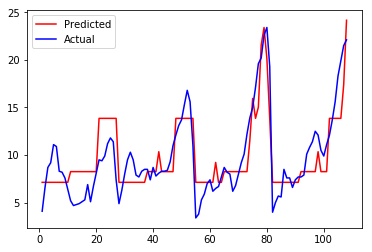

In [25]:
# Plotting prediction and actual for training set
x = [i for i in range(1, 109)]
plt.plot(x, lin_reg_1.predict(X_train_1), color='red', label = 'Predicted')
plt.plot(x, y_train, color='blue', label = 'Actual')
plt.legend()
plt.show()

## Polynomial Features

In [26]:
from sklearn.preprocessing import PolynomialFeatures

In [27]:
poly_reg = PolynomialFeatures(degree = 2)
X_poly_train = poly_reg.fit_transform(X_train)
X_poly_test = poly_reg.fit_transform(X_test)

In [28]:
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly_train, y_train)
y_pred_2 = lin_reg_2.predict(X_poly_test)

In [29]:
print("Training Error (RMSE) :", mean_squared_error(y_train, lin_reg_2.predict(X_poly_train)))
print("Testing Error (RMSE) :", mean_squared_error(y_test, y_pred_2))

Training Error (RMSE) : 3.7995153356481484
Testing Error (RMSE) : 1.4735788522134225e+26


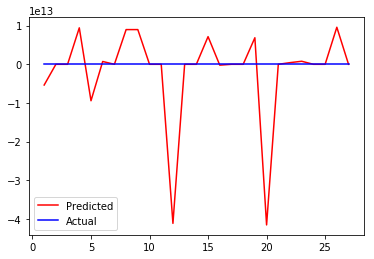

In [30]:
# Plotting prediction and actual values for testing set
x = [i for i in range(1, 28)]
plt.plot(x, y_pred_2, color='red', label = 'Predicted')
plt.plot(x, y_test, color='blue', label = 'Actual')
plt.legend()
plt.show()

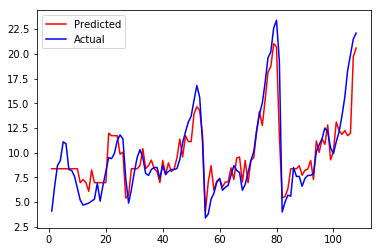

In [31]:
# Plotting prediction and actual for training set
x = [i for i in range(1, 109)]
plt.plot(x, lin_reg_2.predict(X_poly_train), color='red', label = 'Predicted')
plt.plot(x, y_train, color='blue', label = 'Actual')
plt.legend()
plt.show()